# 3. Machine Learning for classification

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3.2 Data preparation

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [5]:
!wget $data -O data-week-3.csv

--2025-09-07 08:08:01--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.005s  

2025-09-07 08:08:05 (178 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [6]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [9]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [11]:
df['totalcharges'][488]

'_'

In [12]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [13]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [14]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [15]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [16]:
df.churn = (df.churn == 'yes').astype(int)

# 3.3 Set up the validation framework

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [19]:
len(df_full_train), len(df_test)

(5634, 1409)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)

(4507, 1127, 1409)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [24]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 EDA

In [25]:
df_full_train = df_full_train.reset_index(drop=True)

In [26]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [27]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [28]:
df_full_train.churn.value_counts(normalize = True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [29]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [30]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [31]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [32]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [33]:
categorical = [
    'gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice','onlinesecurity', 
    'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 
    'streamingmovies', 'contract', 'paperlessbilling','paymentmethod'
]

In [34]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature importance: Churn rate the risk ratio

Churn rate

In [35]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [36]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [37]:
churn_global = df_full_train.churn.mean()
churn_global

np.float64(0.26996805111821087)

In [38]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [39]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [40]:
churn_global - churn_partner

np.float64(0.06493474245795922)

**Risk Ratio**

In [41]:
churn_no_partner / churn_global

np.float64(1.2216593879412643)

In [42]:
churn_partner / churn_global

np.float64(0.7594724924338315)

```sql
SELECT
   gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [43]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - churn_global
df_group['risk'] = df_group['mean'] / churn_global
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [44]:
from IPython.display import display

In [45]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - churn_global
    df_group['risk'] = df_group['mean'] / churn_global
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# 3.6 Feature importnat: Mutual information

In [46]:
from sklearn.metrics import mutual_info_score

In [47]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [48]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [49]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [50]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [51]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [52]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7 Feature importance: Correlation

In [54]:
df_full_train.tenure

0       12
1       42
2       71
3       71
4       30
        ..
5629     9
5630    60
5631    28
5632     2
5633    16
Name: tenure, Length: 5634, dtype: int64

In [55]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [56]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

**negative correlation between tenure and churn** 

In [57]:
df_full_train[df_full_train.tenure <=2].churn.mean()

np.float64(0.5953420669577875)

In [59]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure < 12)].churn.mean()

np.float64(0.4059003051881994)

In [60]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

**negative correlation between monthly charges and churn** 

In [62]:
df_full_train[df_full_train.monthlycharges <=20].churn.mean()

np.float64(0.08795411089866156)

In [63]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges < 50)].churn.mean()

np.float64(0.1836890243902439)

In [64]:
df_full_train[df_full_train.monthlycharges >50].churn.mean()

np.float64(0.32499341585462205)

# 3.8 One-hot encoding

In [65]:
from sklearn.feature_extraction import DictVectorizer

In [68]:
df_train[['gender', 'contract',]].iloc[:10].to_dict(orient='records')

[{'gender': 'male', 'contract': 'one_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'one_year'}]

In [70]:
dicts = df_train[['gender', 'contract']].iloc[:10].to_dict(orient='records')

In [74]:
dv = DictVectorizer(sparse=False)

In [75]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [78]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [76]:
dv.transform(dicts)

array([[0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [79]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [80]:
train_dicts[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'one_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 30,
 'monthlycharges': 19.7,
 'totalcharges': 625.05}

In [82]:
dv = DictVectorizer(sparse=False)

In [86]:
X_train = dv.fit_transform(train_dicts)

In [89]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [90]:
X_val = dv.fit_transform(val_dicts)

# 3.9 Logistic Regression

In [91]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [92]:
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [93]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

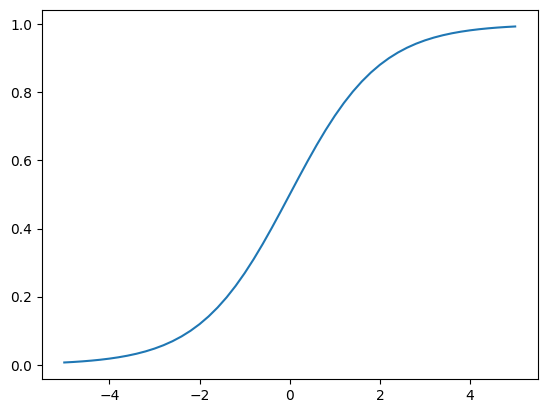

In [95]:
plt.plot(z, sigmoid(z))

In [96]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [97]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

# 3.10 Train logistic regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [103]:
model.coef_[0].round(3)

array([ 0.583, -0.173, -0.526, -0.025, -0.091,  0.067, -0.106, -0.077,
       -0.046, -0.07 , -0.353,  0.343, -0.106,  0.002, -0.244,  0.154,
       -0.026,  0.058, -0.106, -0.068,  0.243, -0.106, -0.253, -0.223,
        0.107, -0.105, -0.011, -0.116, -0.033,  0.085, -0.051,  0.154,
       -0.27 ,  0.194, -0.094, -0.106,  0.084, -0.049, -0.106,  0.039,
        0.215, -0.106, -0.225, -0.07 ,  0.   ])

In [104]:
model.intercept_[0]

np.float64(-0.11799289543738488)

In [107]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4507,))

In [108]:
model.predict_proba(X_train)

array([[0.97836919, 0.02163081],
       [0.39871137, 0.60128863],
       [0.22760893, 0.77239107],
       ...,
       [0.49854621, 0.50145379],
       [0.97020844, 0.02979156],
       [0.29535465, 0.70464535]], shape=(4507, 2))

In [111]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00812541, 0.20555394, 0.21635549, ..., 0.03195289, 0.58892456,
       0.29467693], shape=(1127,))

In [112]:
y_pred >= 0.5

array([False, False, False, ..., False,  True, False], shape=(1127,))

In [113]:
churn_decision = (y_pred >= 0.5)

In [115]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1114    8740-cryfy
1115    0723-drclg
1117    4195-nzgta
1118    2761-ociax
1125    2528-hfyzx
Name: customerid, Length: 261, dtype: object

In [116]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1127,))

In [117]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 0], shape=(1127,))

In [121]:
y_val == churn_decision

array([ True,  True,  True, ...,  True,  True, False], shape=(1127,))

In [122]:
(y_val == churn_decision).mean()

np.float64(0.80301685891748)

In [123]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [124]:
df_pred

,probability,prediction,actual
0,0.008125,0,0
1,0.205554,0,0
2,0.216355,0,0
3,0.576786,1,1
4,0.209447,0,0
...,...,...,...
1122,0.001354,0,0
1123,0.131603,0,0
1124,0.031953,0,0
1125,0.588925,1,1


In [125]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [126]:
df_pred

,probability,prediction,actual,correct
0,0.008125,0,0,True
1,0.205554,0,0,True
2,0.216355,0,0,True
3,0.576786,1,1,True
4,0.209447,0,0,True
...,...,...,...,...
1122,0.001354,0,0,True
1123,0.131603,0,0,True
1124,0.031953,0,0,True
1125,0.588925,1,1,True


In [127]:
df_pred.correct.mean()

np.float64(0.80301685891748)

# 3.11 Model interpretation

In [128]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [129]:
zip(dv.get_feature_names_out(), model.coef_[0].round(3))

In [137]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3).tolist()))

{'contract=month-to-month': 0.583,
 'contract=one_year': -0.173,
 'contract=two_year': -0.526,
 'dependents=no': -0.025,
 'dependents=yes': -0.091,
 'deviceprotection=no': 0.067,
 'deviceprotection=no_internet_service': -0.106,
 'deviceprotection=yes': -0.077,
 'gender=female': -0.046,
 'gender=male': -0.07,
 'internetservice=dsl': -0.353,
 'internetservice=fiber_optic': 0.343,
 'internetservice=no': -0.106,
 'monthlycharges': 0.002,
 'multiplelines=no': -0.244,
 'multiplelines=no_phone_service': 0.154,
 'multiplelines=yes': -0.026,
 'onlinebackup=no': 0.058,
 'onlinebackup=no_internet_service': -0.106,
 'onlinebackup=yes': -0.068,
 'onlinesecurity=no': 0.243,
 'onlinesecurity=no_internet_service': -0.106,
 'onlinesecurity=yes': -0.253,
 'paperlessbilling=no': -0.223,
 'paperlessbilling=yes': 0.107,
 'partner=no': -0.105,
 'partner=yes': -0.011,
 'paymentmethod=bank_transfer_(automatic)': -0.116,
 'paymentmethod=credit_card_(automatic)': -0.033,
 'paymentmethod=electronic_check': 0.085

In [138]:
small = ['contract', 'tenure', 'monthlycharges']

In [140]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'one_year', 'tenure': 30, 'monthlycharges': 19.7},
 {'contract': 'month-to-month', 'tenure': 23, 'monthlycharges': 83.75},
 {'contract': 'month-to-month', 'tenure': 14, 'monthlycharges': 95.8},
 {'contract': 'two_year', 'tenure': 56, 'monthlycharges': 19.7},
 {'contract': 'two_year', 'tenure': 63, 'monthlycharges': 98.0},
 {'contract': 'month-to-month', 'tenure': 33, 'monthlycharges': 80.6},
 {'contract': 'month-to-month', 'tenure': 2, 'monthlycharges': 19.25},
 {'contract': 'month-to-month', 'tenure': 8, 'monthlycharges': 30.45},
 {'contract': 'two_year', 'tenure': 66, 'monthlycharges': 66.1},
 {'contract': 'one_year', 'tenure': 42, 'monthlycharges': 54.75}]

In [142]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [144]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [145]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [146]:
X_train_small = dv_small.transform(dicts_train_small)

In [147]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [149]:
w0 = model_small.intercept_[0]
w0.tolist()

-2.537777943464722

In [150]:
w = model_small.coef_[0]
w.round(3).tolist()

[1.011, -0.025, -0.986, 0.028, -0.036]

In [151]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3).tolist()))

{'contract=month-to-month': 1.011,
 'contract=one_year': -0.025,
 'contract=two_year': -0.986,
 'monthlycharges': 0.028,
 'tenure': -0.036}

In [154]:
-2.53 + 1 *1.011 - 0 *0.025 -0 *0.986 + 60*0.0028 - 24**0.036

-2.4722116578318207

In [155]:
sigmoid(_)

np.float64(0.07782935186357297)

# 3.12 Using the model

In [157]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [158]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [159]:
y_full_train = df_full_train.churn.values

In [160]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [161]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [162]:
X_test = dv.transform(dicts_test)

In [163]:
y_pred = model.predict_proba(X_test)[:,1]

In [164]:
churn_decision = (y_pred >= 0.5)

In [165]:
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

In [168]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [170]:
X_small = dv.transform([customer])

In [171]:
model.predict_proba(X_small)[0, 1]

np.float64(0.4979219389473276)

In [172]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [173]:
X_small = dv.transform([customer])

In [174]:
model.predict_proba(X_small)[0, 1]

np.float64(0.6613470087309817)

# 3.13 Summary

- Feature importance - risk, mutual information, correlation
- One-hot encoding can be implemented with `DictVectorizer`
- Logistic regression - linear model like linear regression
- Output of log reg - probability
- Interpretation of weights is similar to linear regression